In [ ]:
import os

from google.cloud import vision

YOUR_SERVICE = 'gcpai.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = YOUR_SERVICE
client = vision.ImageAnnotatorClient()

In [53]:
# 將輸入照片儲存到GCS

from google.cloud import storage

YOUR_BUCKET = 'alexwu0209'
YOUR_PIC = '1_Ziwi Peak _a(1).jpg'

storage_client = storage.Client()
bucket = storage_client.bucket(YOUR_BUCKET)
bucket.blob(YOUR_PIC).upload_from_filename(YOUR_PIC)
image_uri = f'gs://{YOUR_BUCKET}/{YOUR_PIC}'
source = vision.ImageSource(image_uri=image_uri)
image = vision.Image(source=source)
#image = vision.Image()
#image.source.image_uri = image_uri

In [54]:
# one-shot upload

YOUR_PIC = './image_test/2_K9_g_ab.jpg'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [55]:
response = client.document_text_detection(image=image)

NO RENDEREDALS
hadodot New fevlond /紐西蘭原裝進口
Best before date/Batch number: see below
有效期限批號:請見罐底/有效期間:3年
9421016 594900
NO POTATOES, NO RICE, NO SOY, BA
GUARANTEED ANALYSIS:/RAM :
Crude Protein/
Crude Fat/)
Crude Fibre / Blake (63)
Moisture /水分(最多)
Ash 灰質(最多)
Chondroitin Sulfate (min)*/ 8X (1U)*
*Not recognised as an essential nutrient by the AAFCO Cat
Food Nutrient Profiles.
Calorie content:
Calonie Content (calculated)/熱量(計算值)
Calorie Content (calculated)/(+)
INGREDIENTS: Chicken, Water Sufic
90% Chicken Liver, Chicken Heart, Chic
5.5% Green Mussel, Chicken Bone, D
10% (Dipotassium Phosphate, Magnesi
78.0% Acid Complex, Manganese Amina A
4.0% Amino Acid Complex), Dried Kel
300 mg/kg Chloride, Vitamin E Supplement Th
Niacin, Pyridoxine Hydrochlore,
Supplement, Folic Acid), Salt, Tai
1325 大卡/公斤 成分:雞肉、雞肉原湯、斷、
113大卡/罐 紐西蘭綠唇貝、雞骨、以、
NO
RENDEREDALS
hadodot
New
fevlond
/
紐西蘭
原裝
進口
Best
before
date
/
Batch
number
:
see
below
有效期限
批號
:
請見
罐
底
/
有效
期間
:
3
年
9421016
594900
NO
POTATOES
,
NO
RICE


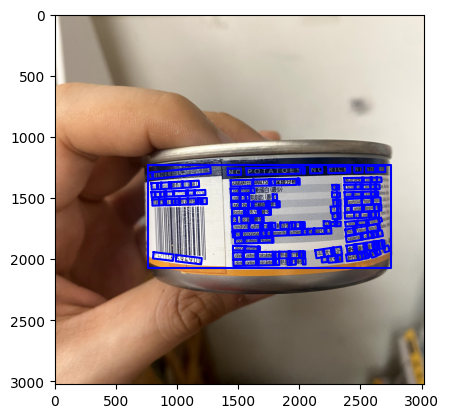

In [56]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)

plt.imshow(im)

for text in response.text_annotations:
    print(text.description)
    a = [(v.x, v.y) for v in text.bounding_poly.vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')

plt.show()

NO RENDEREDALS
hadodot New fevlond /紐西蘭原裝進口
Best before date/Batch number: see below
有效期限批號:請見罐底/有效期間:3年
9421016 594900
NO POTATOES, NO RICE, NO SOY, BA
GUARANTEED ANALYSIS:/RAM :
Crude Protein/
Crude Fat/)
Crude Fibre / Blake (63)
Moisture /水分(最多)
Ash 灰質(最多)
Chondroitin Sulfate (min)*/ 8X (1U)*
*Not recognised as an essential nutrient by the AAFCO Cat
Food Nutrient Profiles.
Calorie content:
Calonie Content (calculated)/熱量(計算值)
Calorie Content (calculated)/(+)
INGREDIENTS: Chicken, Water Sufic
90% Chicken Liver, Chicken Heart, Chic
5.5% Green Mussel, Chicken Bone, D
10% (Dipotassium Phosphate, Magnesi
78.0% Acid Complex, Manganese Amina A
4.0% Amino Acid Complex), Dried Kel
300 mg/kg Chloride, Vitamin E Supplement Th
Niacin, Pyridoxine Hydrochlore,
Supplement, Folic Acid), Salt, Tai
1325 大卡/公斤 成分:雞肉、雞肉原湯、斷、
113大卡/罐 紐西蘭綠唇貝、雞骨、以、
NO
RENDEREDALS
hadodot
New
fevlond
/
紐西蘭
原裝
進口
Best
before
date
/
Batch
number
:
see
below
有效期限
批號
:
請見
罐
底
/
有效
期間
:
3
年
9421016
594900
NO
POTATOES
,
NO
RICE


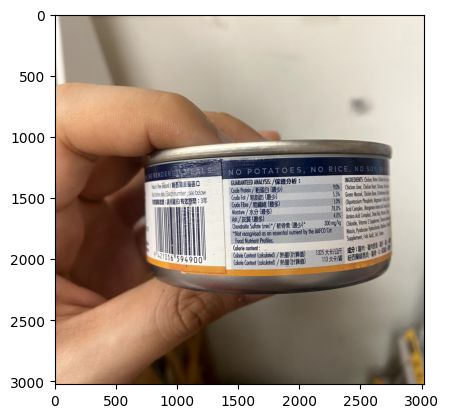

In [57]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)
get_list = []
plt.imshow(im)

for text in response.text_annotations:
    print(text.description)
    get = text.description
    get_list.append(get)

In [58]:
print(get_list)

['NO RENDEREDALS\nhadodot New fevlond /紐西蘭原裝進口\nBest before date/Batch number: see below\n有效期限批號:請見罐底/有效期間:3年\n9421016 594900\nNO POTATOES, NO RICE, NO SOY, BA\nGUARANTEED ANALYSIS:/RAM :\nCrude Protein/\nCrude Fat/)\nCrude Fibre / Blake (63)\nMoisture /水分(最多)\nAsh 灰質(最多)\nChondroitin Sulfate (min)*/ 8X (1U)*\n*Not recognised as an essential nutrient by the AAFCO Cat\nFood Nutrient Profiles.\nCalorie content:\nCalonie Content (calculated)/熱量(計算值)\nCalorie Content (calculated)/(+)\nINGREDIENTS: Chicken, Water Sufic\n90% Chicken Liver, Chicken Heart, Chic\n5.5% Green Mussel, Chicken Bone, D\n10% (Dipotassium Phosphate, Magnesi\n78.0% Acid Complex, Manganese Amina A\n4.0% Amino Acid Complex), Dried Kel\n300 mg/kg Chloride, Vitamin E Supplement Th\nNiacin, Pyridoxine Hydrochlore,\nSupplement, Folic Acid), Salt, Tai\n1325 大卡/公斤 成分:雞肉、雞肉原湯、斷、\n113大卡/罐 紐西蘭綠唇貝、雞骨、以、', 'NO', 'RENDEREDALS', 'hadodot', 'New', 'fevlond', '/', '紐西蘭', '原裝', '進口', 'Best', 'before', 'date', '/', 'Batch', 'number', ':'

In [59]:
#一次找多個敏感物質
substrings = ["蕃薯", "甲苯醌", "豌豆", "天然香料",  "膠"]

found = [s for s in substrings if s in get_list]

if found:
    print("發現敏感物質")
else:
    print("未發現敏感物質") 

未發現敏感物質
